## Final Project Goals
The project's goal is to use a machine-learning model to explore and analyze the different factors of each country that contribute to happiness. We will be comparing countries to see if there are any factors that are most correlated to the happiness scores of the happiest countries, whether it be the countries' GCP, freedom, health, etc. The analyses can then be used by individuals or world leaders to shape different countries so that people can live with the maximum happiness possible.

## The Procedure
- Import data from the dataset
- Load and explore the data
- Clean up the data
- Perform Extensive Exploratory Data Analysis (EDA)
- Create models of the data
- Analyze the models and results
- Conclusions on the generated models/results

## The Dataset
Dataset: Sustainable Development Solutions Network. World Happiness Report. Kaggle. https://www.kaggle.com/datasets/unsdsn/world-happiness

This dataset is from The World Happiness Report was first published in 2012, however, for this project, we will focus on the reports from 2015 and 2019(The oldest and latest data set available). There are 158 countries that have happiness reports in this dataset. 

Besides the country, region of the country, happiness score, and happiness rank, the following columns are the factors that could affect the happiness score:
- Economy (GDP per Capita)
- Family
- Health (Life Expectancy)
- Freedom
- Trust (Government Corruption)

## Machine Learning Models
- sklearn.model_selection for splitting the dataset and tuning models
- StandardScaler from sklearn.preprocessing for feature scaling
- sklearn.metrics for evaluating model performance
- Logistic Regression, Random Forest Classifier, and Support Vector Machines as the machine learning models

These models are used to get metrics such as accuracy and mean squared error

## Setup Imports

In [21]:
%pip install seaborn

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data
Loading the 2019 dataset below and sampling the data to view. As printed, it shows the top 5 and last 5 countries by ranking from the happiness report. The dataset is loaded into a pandas Dataframe using pd.read_csv(), this will let us use the data in a more structured format during our analysis.

In [3]:
#Load the data
data = pd.read_csv("2019.csv")

## Cleaning
At this section, we will need to look at the whole dataset to see if there are any invalid or unusable data that should be dropped from the dataset. For example, any NaN values from the factors of each country, those countries can be dropped due to missing data. Additionally, if there are any values that are not plausible, those rows can also be deemed invalid.

Identifying if there are any missing values in the data is important as they can affect the analysis and model performance later on. Hence, data.isna().sum() was used to check for any missing values for each column. data.info displays the data types for processing and modeling and verifying that the data types are appropriate. 

In [5]:
# Checks for any missing values
print("Invalid Values")
print(data.isna().sum())
print()

# Prints the data types
data.info()

Invalid Values
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity               

This dataset is quite well maintained with no invalid data, hence no rows with missing values needed to be dropped and can use the dataset as is.

## Exploratory Data Analysis (EDA)

With the EDA, we would start to explore and analysis the data. Starting with using data.shape to look at the dimensions of the dataset, with providing the number of rows and columns below. As we can see there are 156 rows (or countries) in this dataset.

In [4]:
#Display the colums of the data set
print("Number of Countries(Rows): " + str(data.shape[0]))
print("Number of Factors Attributed to Each Country(Columns): " + str(data.shape[1]))
print(data)

Number of Countries(Rows): 156
Number of Factors Attributed to Each Country(Columns): 9
     Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choi

### Statistical Metrics
data.describe() displays the mean, std, minimum, and maximum values for the dataset which will assist in understand the range/distribution of the data.

In [6]:
data.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


## Data Visualization
With the dataset ready to be analyze, let's explore the top and bottom 20 countries ranked in the Worlds Happiness Report

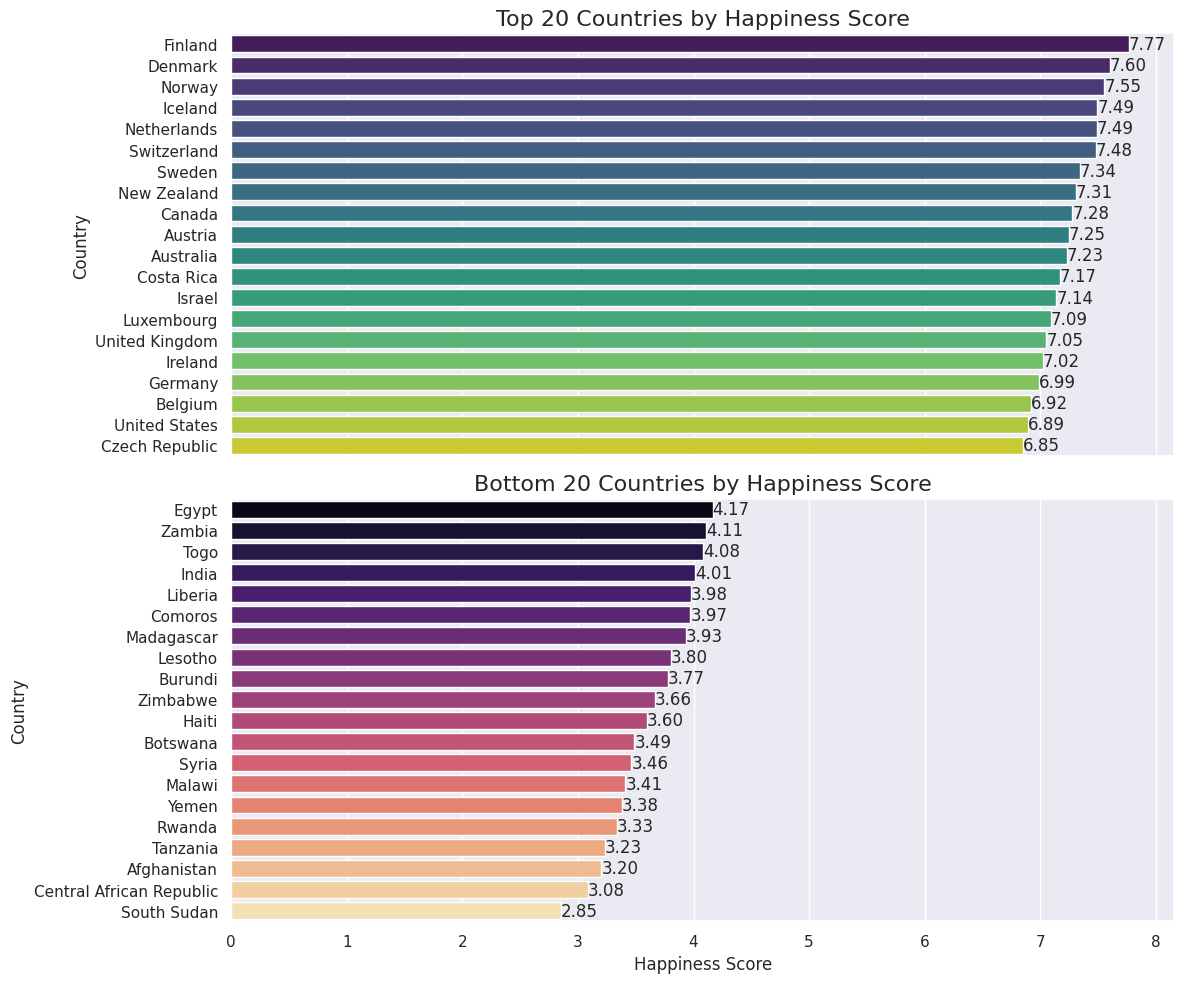

In [7]:
#Visuals for the plot
sns.set(style="darkgrid")
sorted_data = data.sort_values(by='Score', ascending=False)
top_20 = sorted_data.head(20)
bottom_20 = sorted_data.tail(20)
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot for top 20 countries
sns.barplot(x='Score', y='Country or region', data=top_20, ax=axes[0], hue='Country or region', palette="viridis", dodge=False, legend=False)
axes[0].set_title('Top 20 Countries by Happiness Score', fontsize=16)
axes[0].set_xlabel('Happiness Score')
axes[0].set_ylabel('Country')
for index, value in enumerate(top_20['Score']):
    axes[0].text(value, index, f'{value:.2f}', va='center')

# Plot for bottom 20 countries
sns.barplot(x='Score', y='Country or region', data=bottom_20, ax=axes[1], hue='Country or region', palette="magma", dodge=False, legend=False)
axes[1].set_title('Bottom 20 Countries by Happiness Score', fontsize=16)
axes[1].set_xlabel('Happiness Score')
axes[1].set_ylabel('Country')
for index, value in enumerate(bottom_20['Score']):
    axes[1].text(value, index, f'{value:.2f}', va='center')

#Plot the data
plt.tight_layout()
plt.show()

## Models and Data Preparation
Here we split the data into training and testing sets to better evaluate the model's performance on the overall dataset. The test_size of 0.2 allocates 20% of the data for testing and the random_state of 42 ensures reproducibility. 

At this section the data is also scaled to perform better when numerical features are on a similar scale for machine learning algorithms. StandardScaler() standardizes the happiness factors by removing the mean and scaling to an unit variance resulting in a mean of 0 and a standard deviation of 1 for each feature.

In [13]:
# Define features (X) and target (y) variables
X = data[['GDP per capita', 'Social support', 'Healthy life expectancy', 
          'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = data['Score']  # Assuming we're predicting the happiness score

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization) for models like SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Linear versus Random Forest Regression
In this section, we will run the features with a linear regression and using a random forest regression to see which model is a better fit. 

Random Forest Regressor outperformed a simpler linear model in capturing non-linear relationships between the different happiness features with a strong R2 score. In this case, the Random Forest model has a good fit, explaining a large portion of the variance in happiness scores.

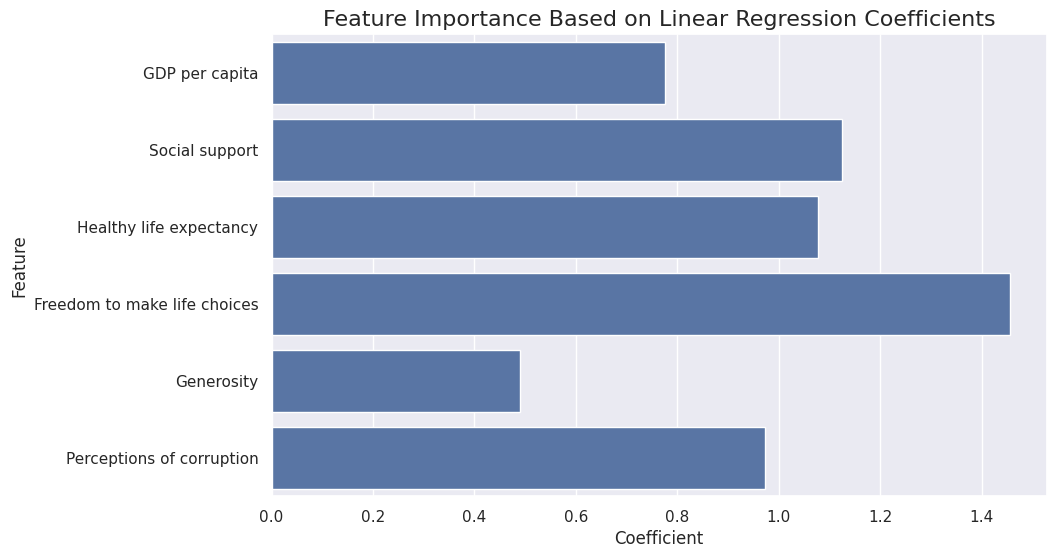

In [14]:
linear_model = LinearRegression()
linear_model.fit(X, y)
coefficients = linear_model.coef_
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Plot the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importance Based on Linear Regression Coefficients', fontsize=16)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

#### Random Forest Regressor
Since the dataset seems to be regression-based, a random forest regressor is a good fit for predicting continuous values for the happiness score. This model will show the highest prediction of happiness score for each country. MSE and R2 shoes the model's accuracy and goodness of fit.

As seen from the model below, Social support contributes the most to the happiness score, followed by GDP per capita. 

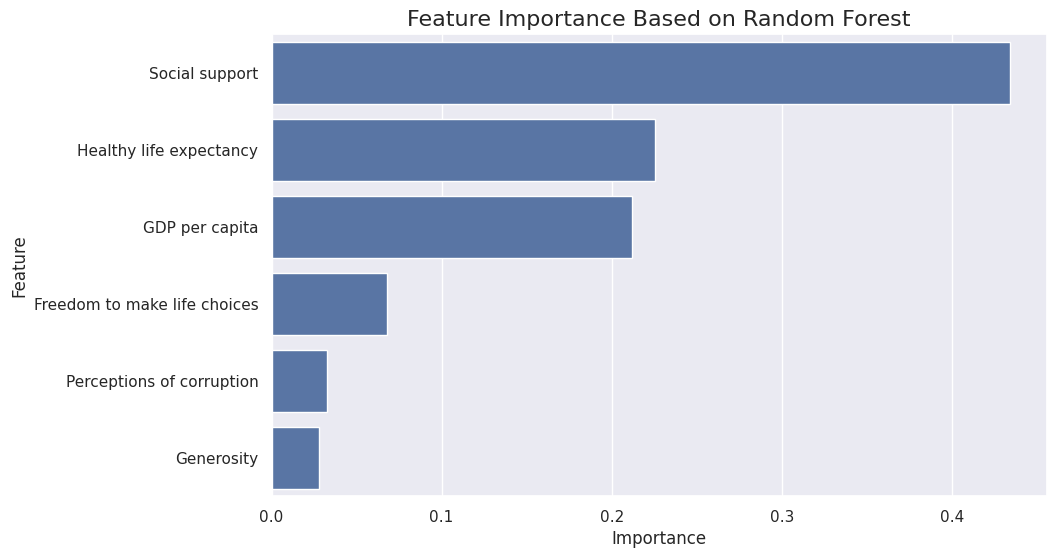

In [10]:
# Random Forest model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X, y)
importances = forest_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance Based on Random Forest', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Correlation Heatmap
A correlation heatmap was generated to display which pairs of factors have a linear relationship the most and help visualize the more correlated factors easily. Factors that are highly correlated can cause issues such as multicollinearity which can affect models and analysis.

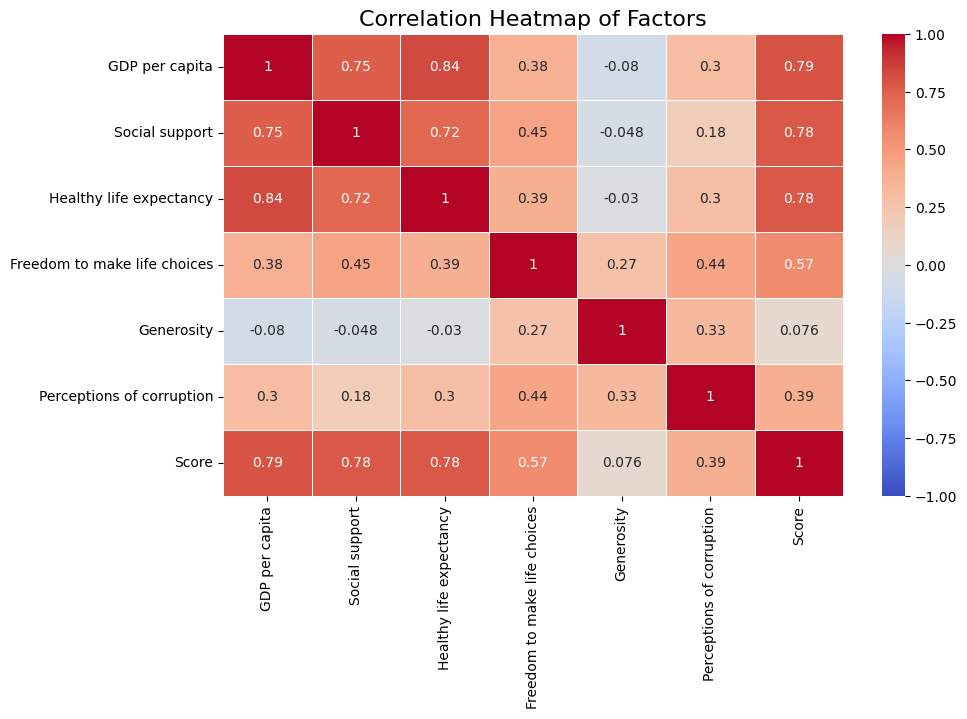

In [8]:
corr_matrix = data[['GDP per capita', 'Social support', 'Healthy life expectancy',
                    'Freedom to make life choices', 'Generosity', 
                    'Perceptions of corruption', 'Score']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

# Title and labels
plt.title('Correlation Heatmap of Factors', fontsize=16)
plt.show()

## Pairplot for Visualizing Relationships
A pairplot displays the relationship between factors and helpful for exploring relationship between mulitple pairs of features in a dataset. The below is a grid of scatter plots where each pair of features are plotted against each other so you can quickly see how two variables are related to each other. Eg. it is easy to see how GCP per capita correlates with Happiness Score or how Social Support correlates with Life Expectancy. 

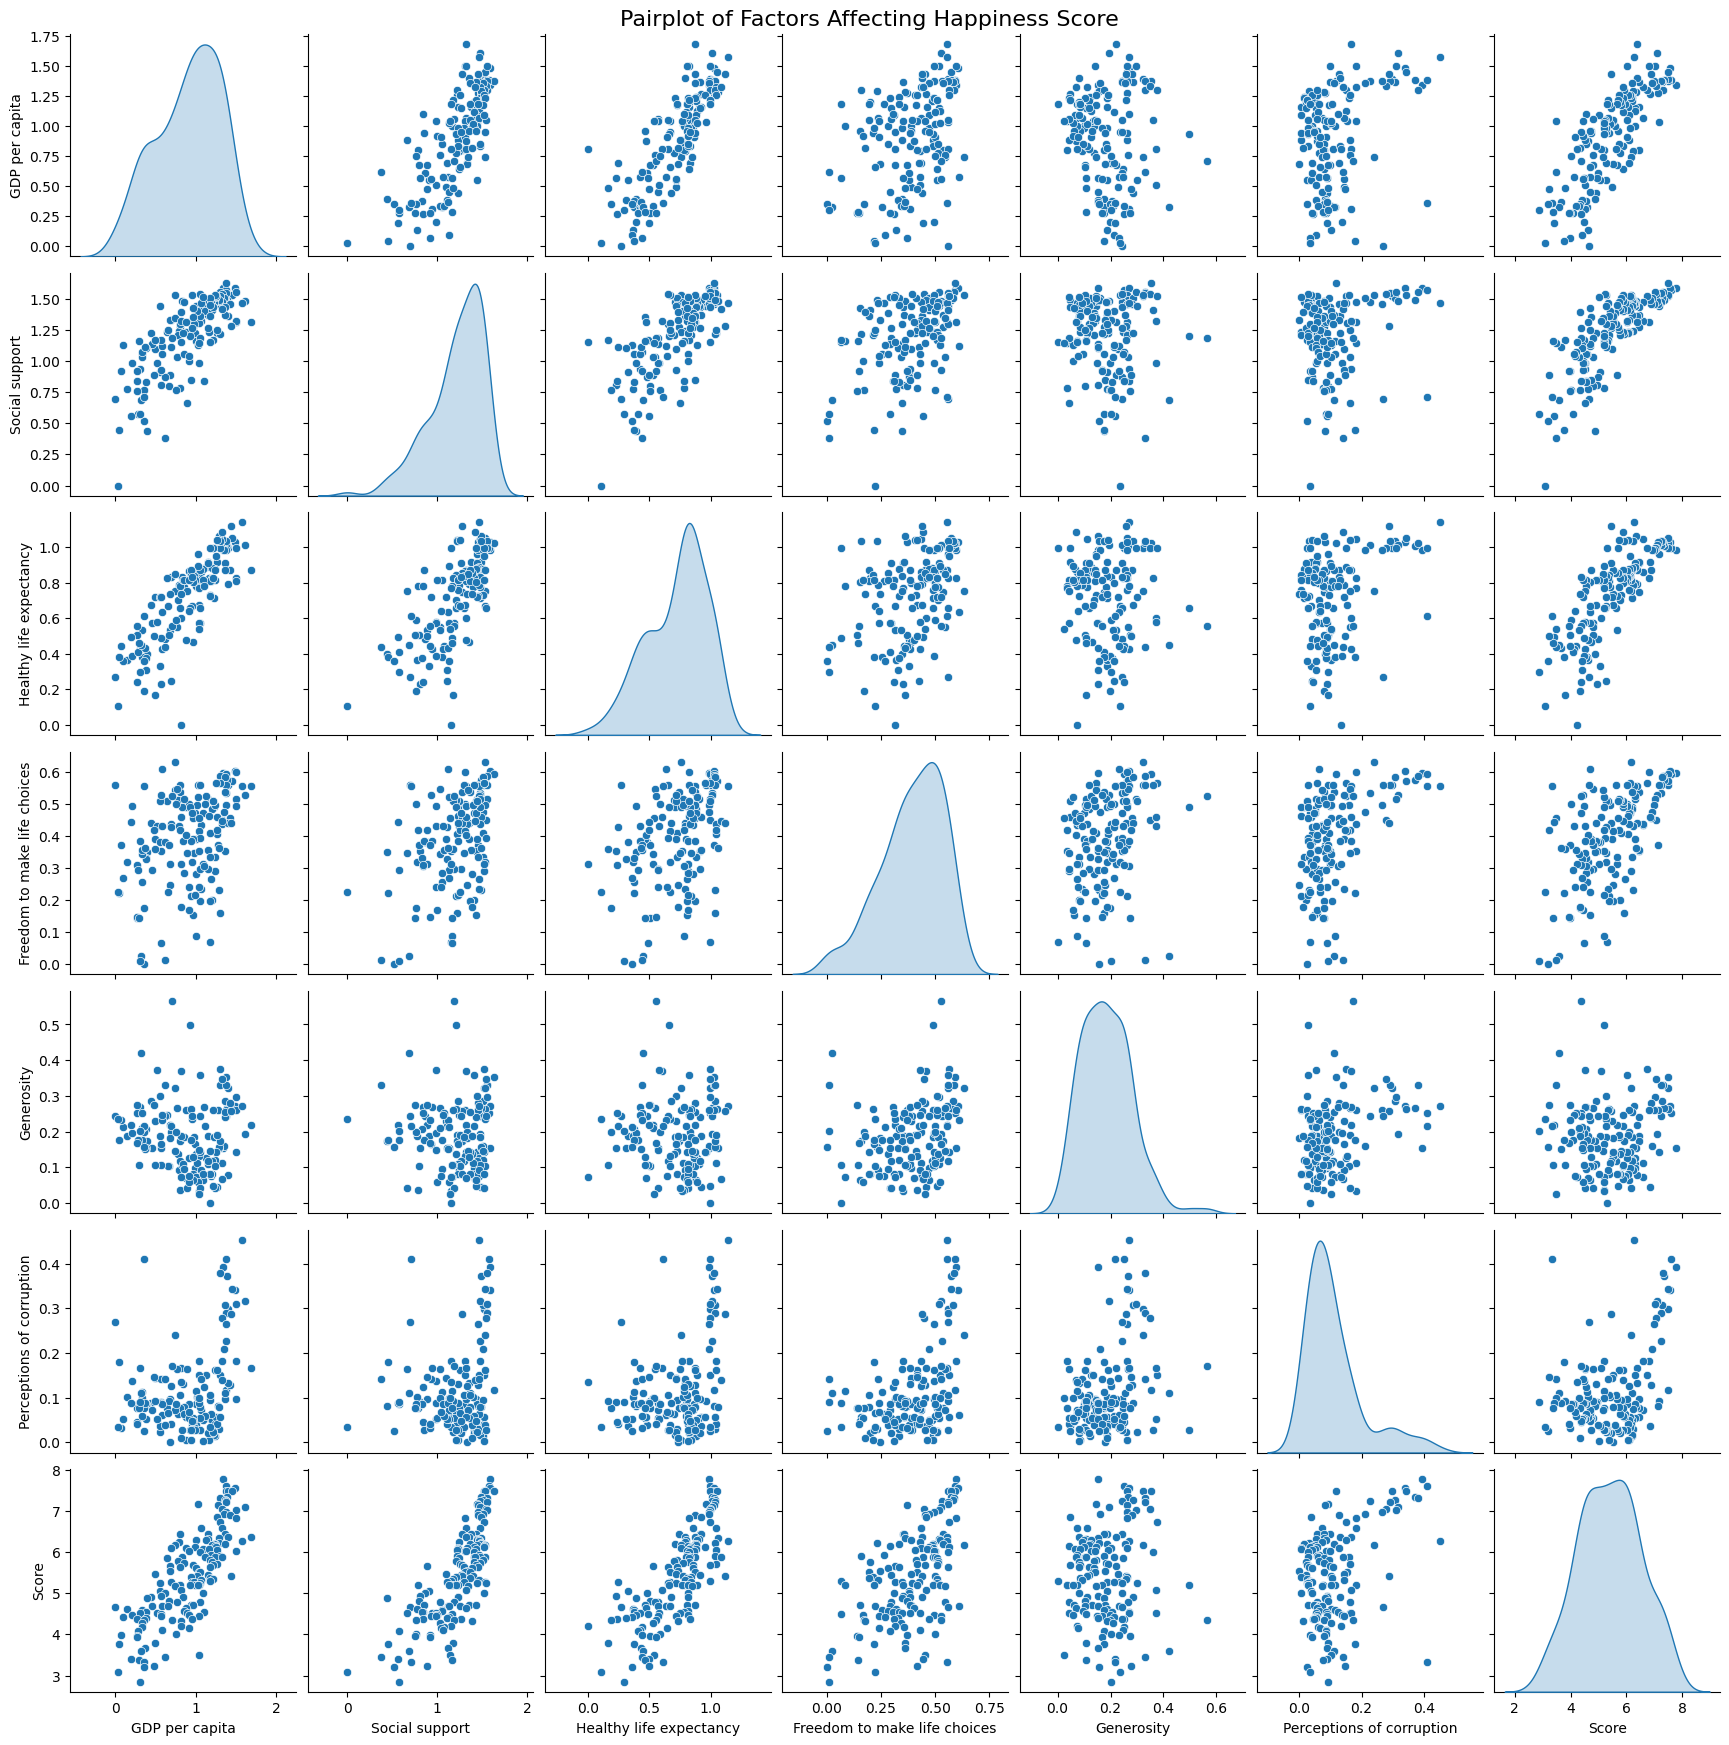

In [9]:
# Creation of pairplot
features = ['GDP per capita', 'Social support', 'Healthy life expectancy', 
            'Freedom to make life choices', 'Generosity', 
            'Perceptions of corruption', 'Score']

sns.pairplot(data[features], diag_kind='kde')
plt.suptitle('Pairplot of Factors Affecting Happiness Score', y=1, fontsize=16)
plt.show()

### Support Vector Machine (SVM)

In [63]:
# Initialize the model
svm_model = SVR(kernel='linear')

# Train the model (using scaled features)
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f'SVM Mean Squared Error: {mse_svm:.4f}')

SVM Mean Squared Error: 0.4180


### Decision Tree Regressor

In [28]:
# Initialize the model
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f'Decision Tree Mean Squared Error: {mse_tree:.4f}')

Decision Tree Mean Squared Error: 0.5618


#### K-Means Clustering
In this section, we can group countries based on similar features like GDP per capita, social support, etc using K-means Clustering model. With this model, it can identify clusters of data points with how each country is similar to the other. For example, countries with high GDP and high life expectancy might fall into one cluster while countries with low GDP and low life expectancy are grouped together. It can also relate features to others like countries with higher GDP usually correlates to better social support or better life expectancy. This model can also be used to predict new countries' happiness score with just their features.

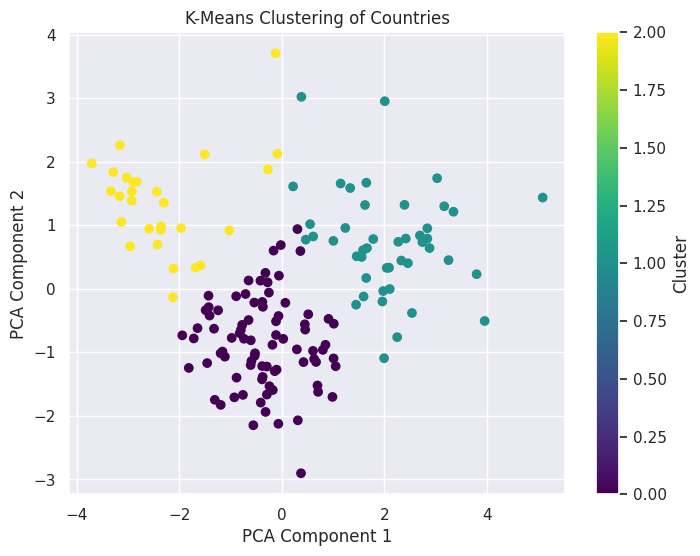

,Country or region,Cluster
0,Finland,2
1,Denmark,2
2,Norway,2
3,Iceland,2
4,Netherlands,2
...,...,...
151,Rwanda,1
152,Tanzania,1
153,Afghanistan,1
154,Central African Republic,1


In [29]:
features = data[['GDP per capita', 'Social support', 'Healthy life expectancy', 
                 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

# Step 1: Normalize the data (scaling to standard normal distribution)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 2: Apply K-Means clustering
# Choosing a reasonable number of clusters, e.g., 3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Step 3: Add cluster labels to the original dataframe
data['Cluster'] = clusters

# Step 4: Optional - Reduce dimensions to 2 for visualization using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Step 5: Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering of Countries')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Show the data with assigned clusters
data[['Country or region', 'Cluster']]

## Results and Analysis
From the evaluation, models, and analyses above of the World's Happiness Report we were able to make final conclusions of how different features can affect how a country scores on the happiness score with the summary of each key points below:

#### Key Drivers of Happiness:
- Social support highly affects the happiness of individuals, followed by GDP per capita.
- Generosity and Perceptions of Corruption showed the weakest correlation with happiness. Though these two factors scored lower, they still affect the happiness score.

#### Model Performance:
- Random Forest Regressor outperformed a simpler linear model in capturing non-linear relationships between the different happiness features with a strong R2 score. In this case, the Random Forest model has a good fit, explaining a large portion of the variance in happiness scores.
- Linear Regression did not perform as well as the Random Forest model due to its assumption of linear relationships between features and the target. With the complex and non-linear dependencies, it struggled to understand direct correlations.

#### Feature Importance:
- GDP per capita, Social Support, and Healthy Life Expectancy are consistently the most important features across models suggesting that economic stability, health, and social relationships are critical to improving happiness.
- Generosity and Perception of Corruption have a lower influence, indicating that while important, they are not the primary drivers of happiness in this dataset.

#### Inter-Feature Relationships
- From the correlation heatmap and pairplot, we observed strong correlations for certain features such as GCP per capita and Healthy Life Expectancy. This shows that wealth tends to contribute to better healthcare systems and longer, happier lives.
- Social Support showed weaker correlations with features like GDP per capita and Healthy Life Expectancy, however it still important as an independent predictor of happiness.
- Freedom to make life choices did not correlate to economic factors but still played a big role in the overall well-being of individuals.


## Conclusion
The main takeaway from the analyses and models of the World's Happiness Report is that countries that tend to have better social support and healthier life expectancy score higher on the happiness report. Regardless of country, individuals want to live in a stress-free environment with good health care, this also contributes to longer life expectancy. On the other end, Perception and Generosity do not affect the happiness score as much as the other features contribute to the happiness score but still play an essential role. The models and visuals were able to concretely support the features and their correlation to the countries' happiness which can then be used to help increase happiness around the world!

#### Model Limitations
- Features like Freedom to make life choices and generosity may have non-linear relationships with happiness score which makes simpler models like linear regression harder to fit.
- Perception of Corruption varied in importance depending on the cultural and political environment of different countries, which could affect how well the model generalizes across different regions.

#### Future Improvements
- To get a comprehensive view, additional features and more data collection could be incorporated. Data such as Education, Mental Health, or Unemployment Rate could also highly affect the happiness score of a country.
- Better handling of data imbalance and outliers can lead to more unbias prediction models. Implementing a sampling technique can ensure models learn from a more balanced dataset.
- Data preprocessing can also be improved with polynomial features in between variables that could uncover additional insights and improve model performance.